In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오기

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/데이터시각화/breast_cancer (1).csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=2019)

x_train = train.drop(['diagnosis'], axis=1)
y_train = train.diagnosis

x_test = test.drop(['diagnosis'], axis=1)
y_test = test.diagnosis

print(len(train), len(test))

455 114


# 모델 만들기 및 평가

## 1. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

- 모델 만드는 방법
1. 모델 정의: 모델 이름 붙여주기, 어떤 모델 사용할건지 선택
2. 모델 훈련: model.fit(x_train, y_train)
3. 모델 예측: model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[63  8]
 [ 4 39]]


In [ ]:
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\F1: {3:.4f}'.format(accuracy, precision, recall, f1))

정확도: 0.8947, 정밀도: 0.8298, 재현율: 0.9070,\F1: 0.8667


In [ ]:
# 예측 확률 계산
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC_AUC Score:", roc_auc)

ROC_AUC Score: 0.8971503439240092


##### ROC-AUC 의 의미는 이 사이트 참고하시는게 좋을 것 같아요!
https://bioinformaticsandme.tistory.com/328

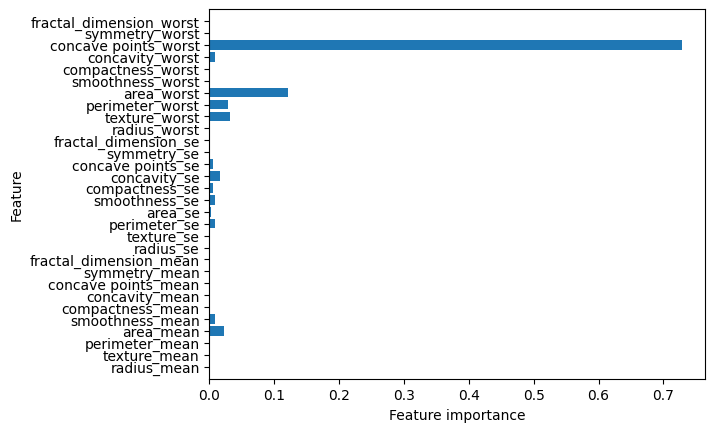

In [ ]:
feature_names = [col for col in data.columns if col != 'diagnosis']

def plot_feature_importances_cancer(model):
    n_features = len(feature_names)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(model)

## 2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100)
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\F1: {3:.4f}'.format(accuracy, precision, recall, f1))

정확도: 0.9386, 정밀도: 0.9091, 재현율: 0.9302,\F1: 0.9195


In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC_AUC Score:", roc_auc)

ROC_AUC Score: 0.8971503439240092


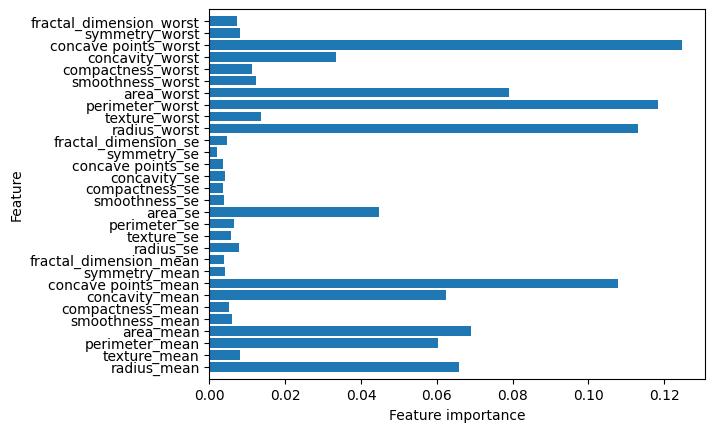

In [ ]:
feature_names = [col for col in data.columns if col != 'diagnosis']

def plot_feature_importances_cancer(model1):
    n_features = len(feature_names)
    plt.barh(np.arange(n_features), model1.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(model1)

## 3. XGBoost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

XGBoost는 matrix형태로 바꿔야 동작함

In [ ]:
dtr = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test , label=y_test)

In [ ]:
params = { 'max_depth':3,        # 예측 틀린게 있어야 가중치로 사용할 수 있으므로 처음부터 완전히 다 맞추려고 하지 않음 -> max_depth는 너무 깊게 두지 않음
          'eta': 0.05,             # eta: 학습률, 그 다음 단계로 넘어갈 때마다 손실함수가 적어지도록
          'objective':'binary:logistic',
          'eval_metric':'logloss'      # eval_metric: 어떤 손실함수 사용할건지: logloss
         }
num_rounds = 400

##### params의 괄호 안에 들어가있는 변수들의 의미는 여기서 더 참고해보시면 좋을 것 같아요!  https://wooono.tistory.com/97

In [ ]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다.
eval_list = [(dtr,'train'),(dtest,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.65131	eval-logloss:0.65615
[1]	train-logloss:0.61338	eval-logloss:0.62231
[2]	train-logloss:0.57734	eval-logloss:0.59036
[3]	train-logloss:0.54478	eval-logloss:0.56111
[4]	train-logloss:0.51574	eval-logloss:0.53585
[5]	train-logloss:0.48809	eval-logloss:0.51130
[6]	train-logloss:0.46207	eval-logloss:0.48550
[7]	train-logloss:0.43829	eval-logloss:0.46233
[8]	train-logloss:0.41702	eval-logloss:0.44435
[9]	train-logloss:0.39647	eval-logloss:0.42636
[10]	train-logloss:0.37739	eval-logloss:0.40949
[11]	train-logloss:0.35897	eval-logloss:0.39393
[12]	train-logloss:0.34214	eval-logloss:0.37727
[13]	train-logloss:0.32707	eval-logloss:0.36541
[14]	train-logloss:0.31174	eval-logloss:0.35199
[15]	train-logloss:0.29741	eval-logloss:0.33953
[16]	train-logloss:0.28463	eval-logloss:0.32936
[17]	train-logloss:0.27291	eval-logloss:0.32020
[18]	train-logloss:0.26091	eval-logloss:0.30917
[19]	train-logloss:0.25024	eval-logloss:0.29851
[20]	train-logloss:0.23956	eval-logloss:0.28876
[2

In [ ]:
pred_probs = xgb_model.predict(dtest)              # model.predict: 가능성만 표시됨
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장
y_pred = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',y_pred[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.    0.996 0.001 0.005 0.997 0.001 0.999 0.006 0.054 0.002]
예측값 10개만 표시: [0, 1, 0, 0, 1, 0, 1, 0, 0, 0]


In [ ]:
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\F1: {3:.4f}'.format(accuracy, precision, recall, f1))

정확도: 0.9561, 정밀도: 0.9318, 재현율: 0.9535,\F1: 0.9425


In [ ]:
roc_auc = roc_auc_score(y_test, pred_probs)
print("ROC_AUC Score:", roc_auc)

ROC_AUC Score: 0.9957418932197838


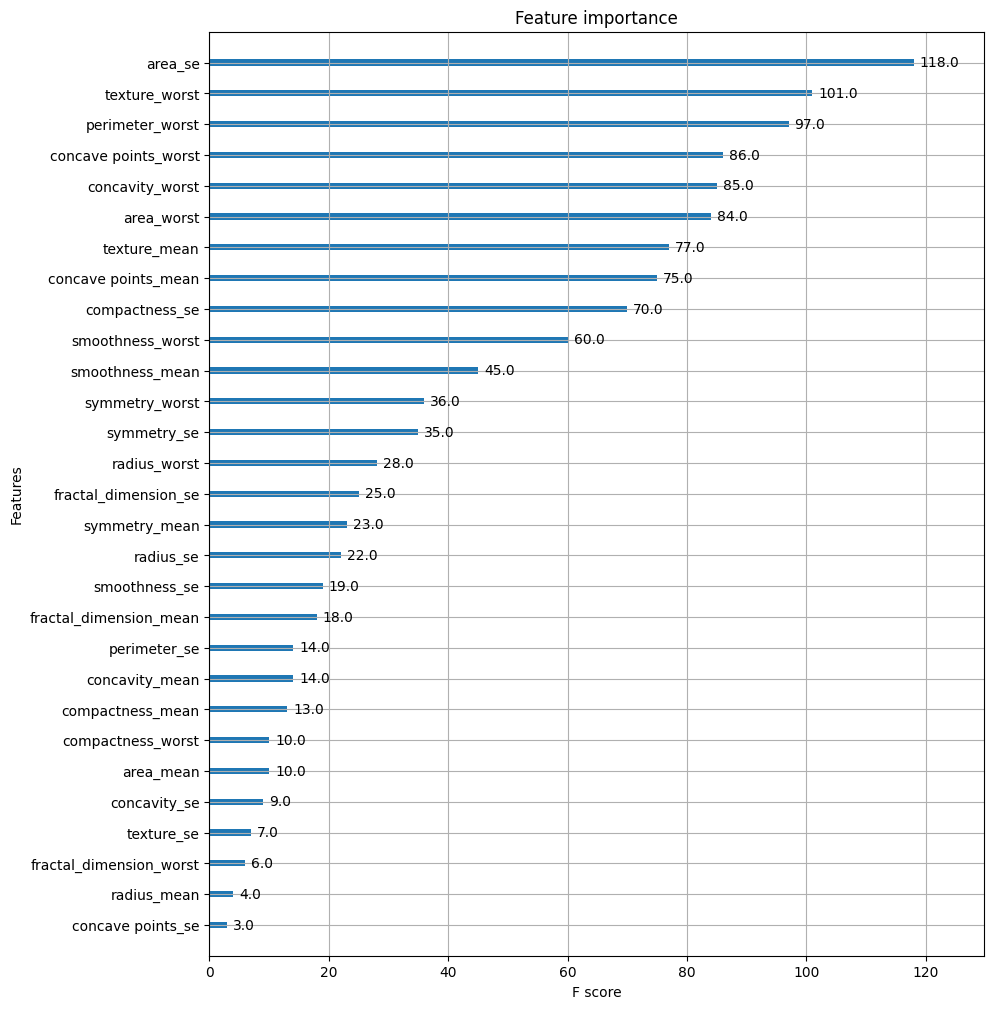

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

In [ ]:
# Scikit-learn wrapper(유용성 측정 방법)의 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test , w_preds)
precision = precision_score(y_test , w_preds)
recall = recall_score(y_test , w_preds)
f1 = f1_score(y_test,w_preds)

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\F1: {3:.4f}'.format(accuracy, precision, recall, f1))

정확도: 0.9561, 정밀도: 0.9130, 재현율: 0.9767,\F1: 0.9438


In [ ]:
roc_auc = roc_auc_score(y_test, w_pred_proba)
print("ROC_AUC Score:", roc_auc)

ROC_AUC Score: 0.99475925319358


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

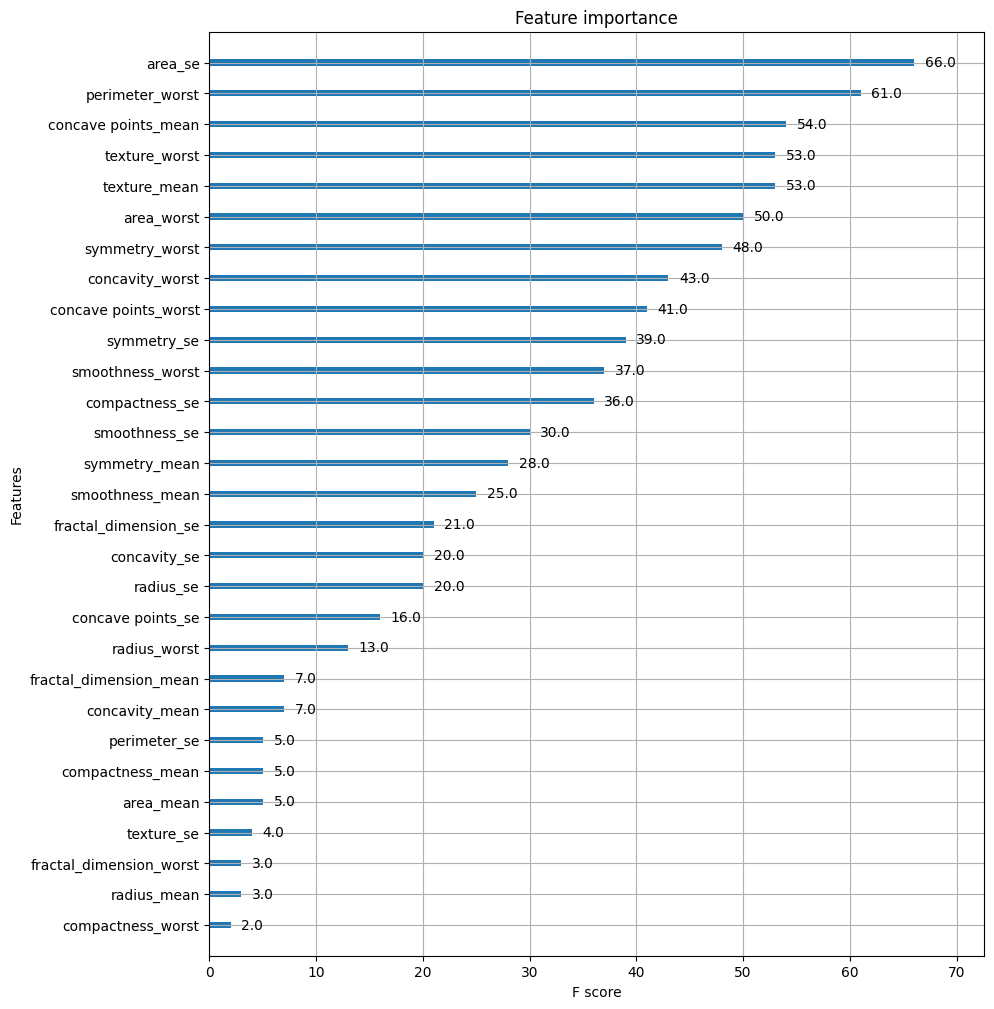

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)

## 4. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(x_train, y_train), (x_test, y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(x_test)
pred_proba = lgbm_wrapper.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's binary_logloss: 0.618436	valid_1's binary_logloss: 0.625505
[2]	training's binary_logloss: 0.582142	valid_1's binary_logloss: 0.593317
[3]	training's binary_logloss: 0.54882	valid_1's binary_logloss: 0.561528
[4]	training's binary_logloss: 0.519111	valid_1's binary_logloss: 0.534882
[5]	training's binary_logloss: 0.491093	valid_1's binary_logloss: 0.510026
[6]	training's binary_logloss: 0.466352	valid_1's binary_logloss: 0.487835
[7]	training's binary_logloss: 0.443849	valid_1's binary_logloss: 0.468289
[8]	training's binary_logloss: 0.421932	valid_1's binary_logloss: 0.449003
[9]	training's binary_logloss: 0.401129	valid_1's binary_logloss: 0.430695
[10]	training's binary_logloss: 0.38294	valid_1's binary_logloss: 0.414147
[11]	training's binary_logloss: 0.365867	valid_1's binary_logloss: 0.399138
[12]	training's binary_logloss: 0.348265	valid_1's binary_logloss: 0.384133
[13]	training's binary_logloss: 0.332881	valid_1's binary_logloss: 0.370843
[14]	training's binary_

In [ ]:
accuracy = accuracy_score(y_test , preds)
precision = precision_score(y_test , preds)
recall = recall_score(y_test , preds)
f1 = f1_score(y_test,preds)

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\F1: {3:.4f}'.format(accuracy, precision, recall, f1))

정확도: 0.9649, 정밀도: 0.9535, 재현율: 0.9535,\F1: 0.9535


In [ ]:
roc_auc = roc_auc_score(y_test, pred_proba)
print("ROC_AUC Score:", roc_auc)

ROC_AUC Score: 0.9950867998689814


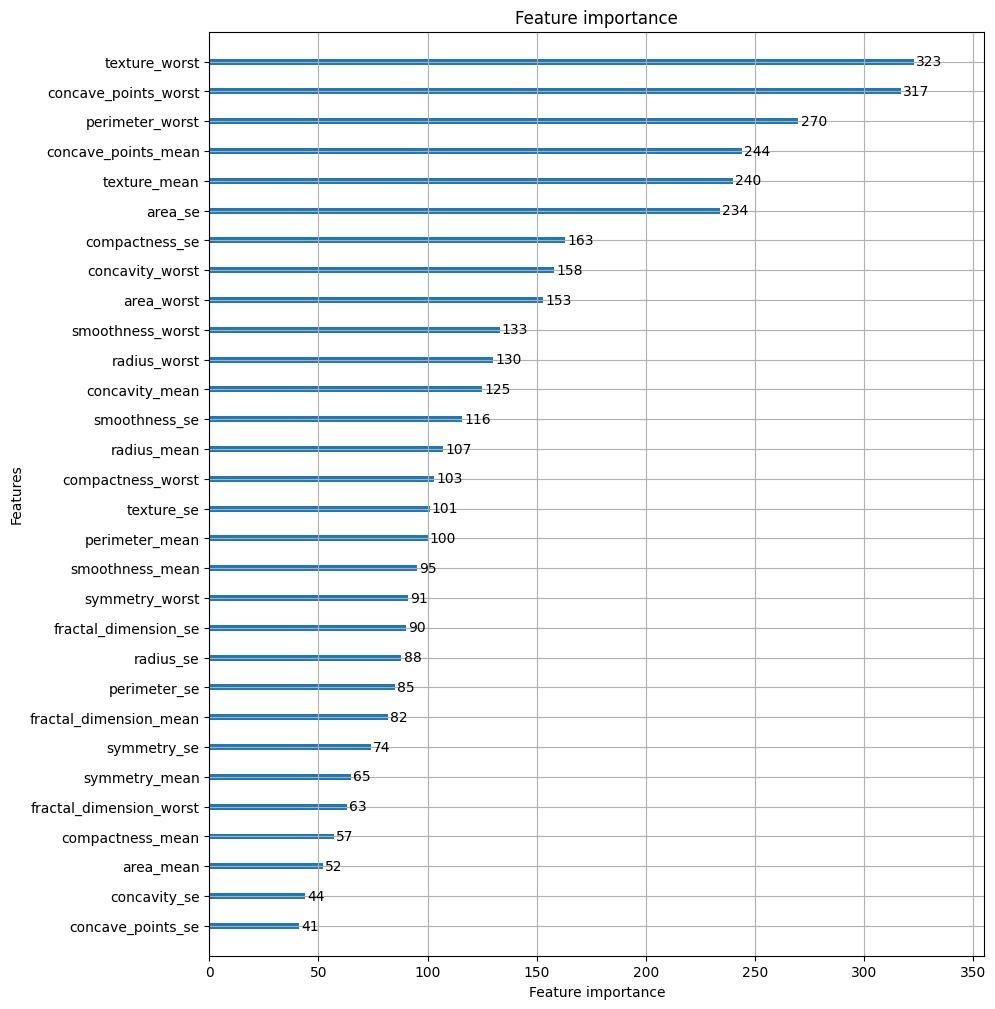

In [ ]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)
plt.savefig('lightgbm_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

## 5. Ensemble model
- 쉽게 말해 정확성을 더 높이기 위해서 앞서 만든 모델들을 하나로 합쳐서 또 다른 하나의 모델을 만들어 내는게 Ensemble model 입니다!

- 앙상블 방법(정말 참고만 해주세요! 아니면 그냥 skip 하셔도 됩니당)

https://hye-z.tistory.com/28
1. Bagging: Random Forest에서 많이 쓰임
2. Boosting: XGBoost(이게 먼저 나옴), LightGBM(속도가 많이 걸림, 병렬처리)  
3. Stacking: 여러 개의 모델을 합쳐서 최종 예측하는 것

In [ ]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier 생성하기
voting_clf = VotingClassifier(
    estimators=[
        ('random_forest', model1),
        ('xgboost', xgb_wrapper),
        ('lightgbm', lgbm_wrapper)
    ],
    voting='soft'
)

In [ ]:
# 모델 학습
voting_clf.fit(x_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred_voting = voting_clf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test , y_pred_voting)
precision = precision_score(y_test , y_pred_voting)
recall = recall_score(y_test , y_pred_voting)
f1 = f1_score(y_test,y_pred_voting)

print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\F1: {3:.4f}'.format(accuracy, precision, recall, f1))

정확도: 0.9561, 정밀도: 0.9524, 재현율: 0.9302,\F1: 0.9412


In [ ]:
y_pred_proba_voting = voting_clf.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba_voting)
print("ROC_AUC Score:", roc_auc)

ROC_AUC Score: 0.9957418932197838
